In [1]:
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt

**1**



$g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2 = x_1^2 + x_2^2 + 98x_1 - 72x_2 + 3697$

$g(\mathbf{x}) = \mathbf{x}^T\begin{bmatrix}1 \ \ 0\\ 0 \ \  1\end{bmatrix}\mathbf{x} + \begin{bmatrix}98 \ \ -72\end{bmatrix}\mathbf{x} + 3697$




Given function: \(f(x_1, x_2) = 256(x_2 - x_1^2)^2 + (2 - x_1)^2\).

Observing the expression, we identify two square terms, indicating that the function is always non-negative. Consequently, the minimum value must be 0.

By setting \(x_1 = 2\), the second term becomes 0. Substituting \(x_1 = 2\) into the first term, we find that for \(x_2 = 4\), the entire function evaluates to 0. Hence, the minimizer for \(f(x)\) will be \((2, 4)\).




Now for $g(x_1, x_2) = (x_1+49)^2 + (x_2-36)^2$, we can easily see that $(-49, 36)$ give minimum value and objective value is 0.
We can find it with other methods also but here one can easily see that at $(-49,36)$ gives minimum value of the function g(x) and we achieve the lowest possible value which is 0 as in g(x) there are two square term so minimum possible value is 0.

**2**

$
\text{arg}\,\min_{\alpha \geq 0} \quad g(x-\alpha \nabla g(x))
$

$
\nabla g(x) = \left\langle 2\left(x_1+49\right), 2\left(x_2-36\right)\right\rangle
$

$
\Rightarrow x-\alpha \nabla g(x) = \left\langle x_1-2 \alpha\left(x_1+49\right), x_2-2 \alpha\left(x_2-36\right)\right\rangle
$

$
\Rightarrow g(x-\alpha \nabla g(x)) = \left(x_1-2 \alpha\left(x_1+49\right)+49\right)^2 +\left(x_2-2 \alpha\left(x_2-36\right)-36\right)^2 \\
= \quad\left(x_1+49\right)^2(1-2 \alpha)^2+\left(x_2-36\right)^2(1-2 \alpha)^2
$

Assuming $\quad \gamma(\alpha) = g(x-\alpha \nabla g(x))$

Minimizing $\gamma(\alpha)$ will result in $\text{argmin}_{\alpha \geqslant 0} g(x-\alpha \nabla g(x))$

To minimize the above function $\gamma(\alpha)$, we differentiate it with respect to $\alpha$ and find the value of $\alpha$ which is 0.5. We then check whether it gives a minimum or maximum, and we see that it is a minimum.

Therefore, $\alpha = 0.5$ is the exact line search coefficient, which is in closed form.


The minimization problem is stated as:

$
\min_{\alpha \geqslant 0} f(x - \alpha \nabla f(x)).
$

The gradient of \(f\) is defined as:

$
\nabla f = \begin{bmatrix}
1024 x_1 (x_1^2 - x_2) + 2 x_1 - 4 \\
-512 x_1^2 + 512 x_2
\end{bmatrix}.
$

Therefore, the argument of the minimization for \(\alpha > 0\) is given by:

$
\begin{aligned}
& \underset{\alpha > 0}{\operatorname{argmin}} f(x - \alpha \nabla f) \\
& = f\left(x_1 - \alpha(1024 x_1(x_1^2 - x_2) + 2 x_1 - 4), \quad x_2 - \alpha(512 x_2 - 512 x_1^2)\right).
\end{aligned}
$

It is important to note that this expression results in a quartic function in \\alpha\), and finding a unique solution for \(\operatorname{argmin}_{\alpha \geqslant 0}\) may not be straightforward. While a closed-form solution might exist, its calculation is challenging, and it may not be unique as it depends on the values of \(x_1\) and \(x_2\).


**3**

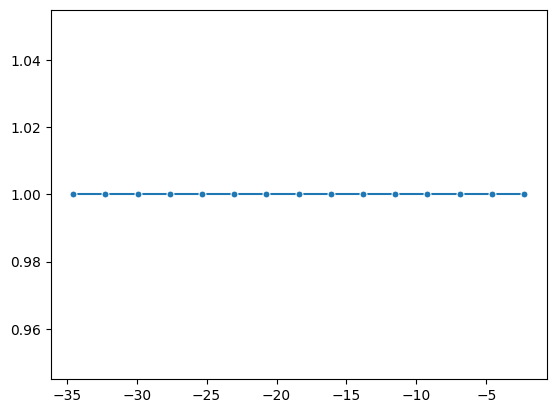

In [2]:
alphas = [10**(-a) for a in range(1, 16)]
x_initial = np.array([36, -49])

def gradient(x_k):
    x1 = x_k[0]
    x2 = x_k[1]
    return np.array([-2*(x1+49), -2*(x2-36)])

def function_g(x_1, x_2):
    return (x_1 + 49)**2 + (x_2 - 36)**2

iterations_new = []
for alpha in alphas:
    x_k = np.copy(x_initial)
    iter_count = 0
    pk = gradient(x_k)

    while norm(pk) > alpha:
        step_size = 0.5
        x_k = x_k + step_size * pk
        pk = gradient(x_k)
        iter_count += 1

    iterations_new.append(iter_count)

import seaborn as sns
sns.lineplot(x=np.log(alphas), y=iterations_new, marker='.', markersize=10)
plt.show()


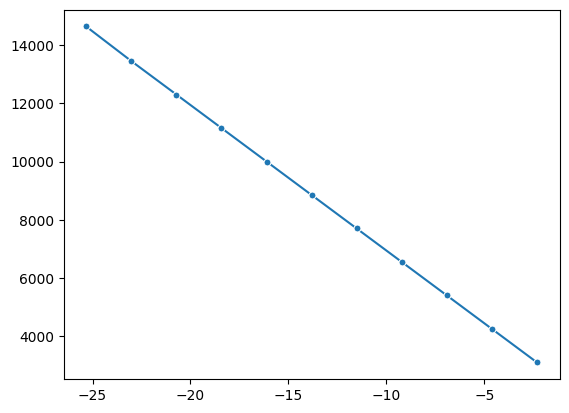

In [3]:
learning_rate = 0.001
initial_position = np.array([-30, 20])

tolerances = [10**(-p) for p in range(1, 12)]
iterations_custom = []

for tolerance in tolerances:
    current_position = np.copy(initial_position)
    iter_count = 0
    gradient_at_current = gradient(current_position)

    while norm(gradient_at_current) > tolerance:
        current_position = current_position + learning_rate * gradient_at_current
        gradient_at_current =gradient(current_position)
        iter_count += 1

    iterations_custom.append(iter_count)

import seaborn as sns

sns.lineplot(x=np.log(tolerances), y=iterations_custom, marker='.', markersize=10)
plt.show()


Upon scrutinizing and contrasting the two plots presented earlier, it is apparent that Algorithm 1, which utilizes an exact line search, efficiently converges in a single step for all considered cases. In contrast, Algorithm 2, employing a constant step size, displays an upward trend in iteration count as the tolerance level decreases. This behavior can be attributed to the tightening of the tolerance, requiring more steps to diminish the gradient to zero. As a result, a higher iteration count is necessary to achieve the desired outcome, indicating an inverse relationship between tolerance level and iteration count.







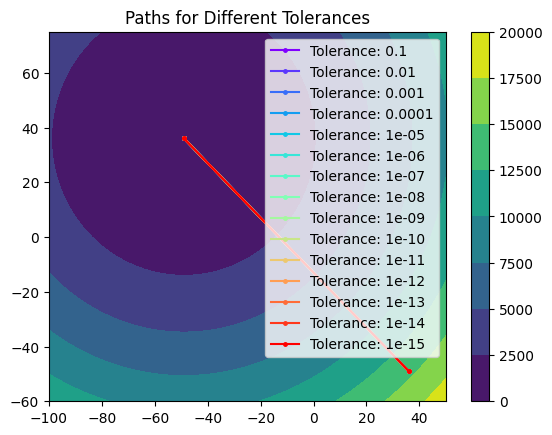

In [4]:
tolerances = [10**(-p) for p in range(1, 16)]
initial_position = np.array([36, -49])

def gradient(x_k):
    x1, x2 = x_k
    return np.array([-2*(x1 + 49), -2*(x2 - 36)])

def quadratic_function(x1, x2):
    return (x1 + 49)**2 + (x2 - 36)**2

iterations = []

x = np.linspace(-100, 50, 1000)
y = np.linspace(-60, 75, 1000)
X, Y = np.meshgrid(x, y)
Z = quadratic_function(X, Y)

fig, ax = plt.subplots()
contour_plot = ax.contourf(X, Y, Z)
cbar = plt.colorbar(contour_plot, ax=ax)

colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(tolerances))))

for tol in tolerances:
    current_position = np.copy(initial_position)
    iteration = 0
    gradient_at_current = gradient(current_position)

    path_x, path_y = [current_position[0]], [current_position[1]]

    while norm(gradient_at_current) > tol:
        step_size = 0.5  # Closed form solution of step length from part 2
        current_position = current_position + step_size * gradient_at_current
        path_x.append(current_position[0])
        path_y.append(current_position[1])
        gradient_at_current = gradient(current_position)
        iteration += 1

    plt.plot(path_x, path_y, marker='.', markersize=5, color=next(colors), label=f'Tolerance: {tol}')

ax.set_facecolor('white')
plt.title("Paths for Different Tolerances")
plt.legend()
plt.show()


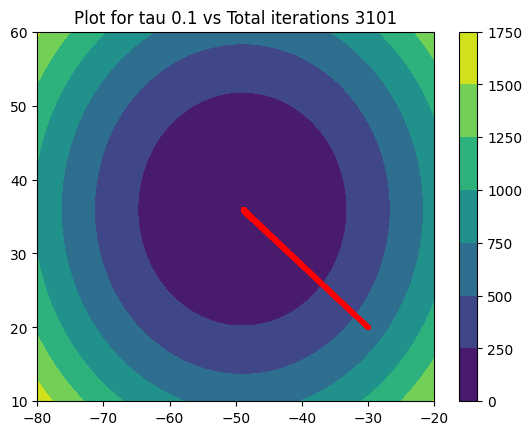

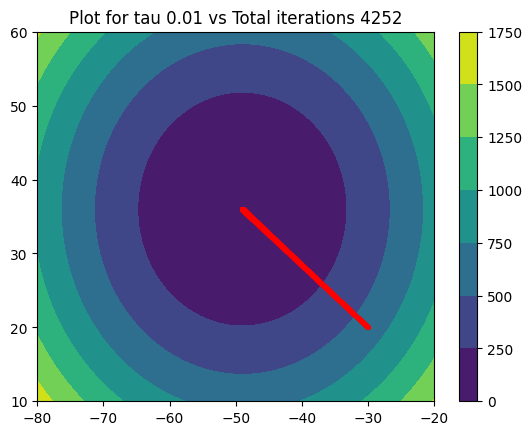

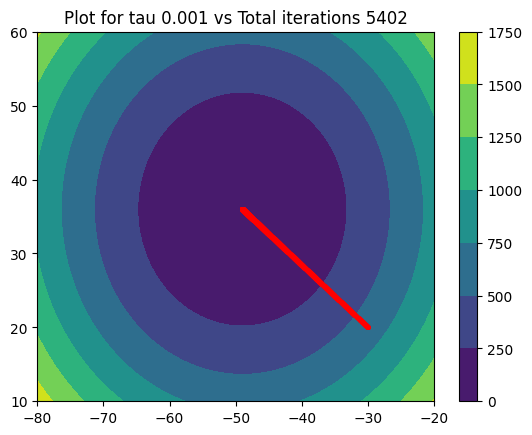

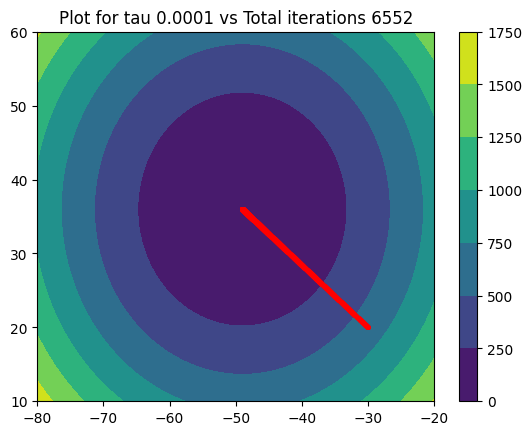

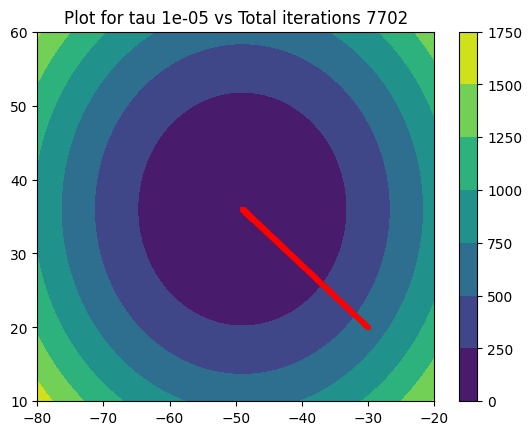

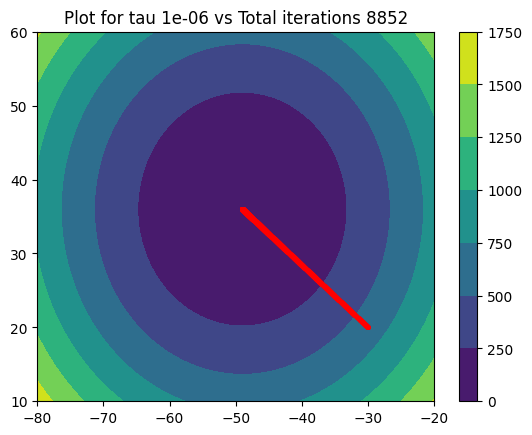

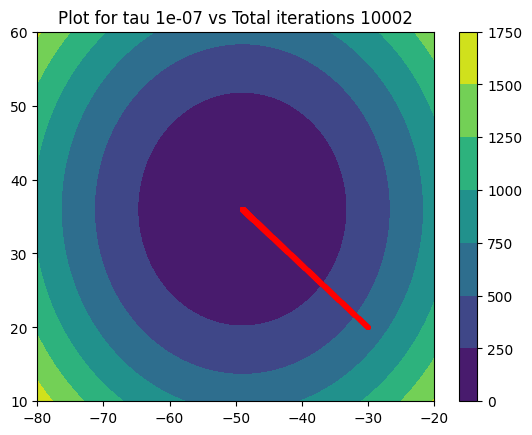

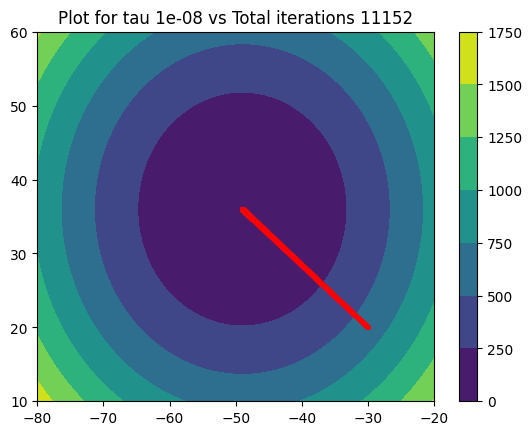

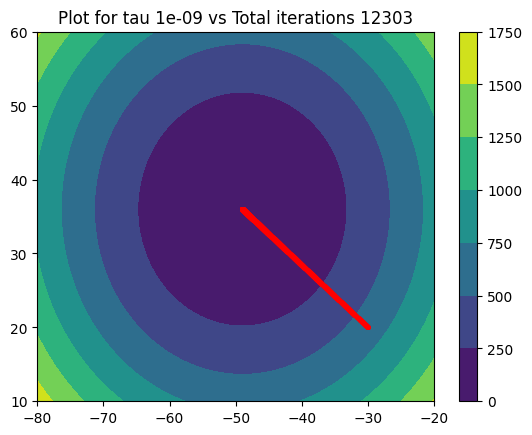

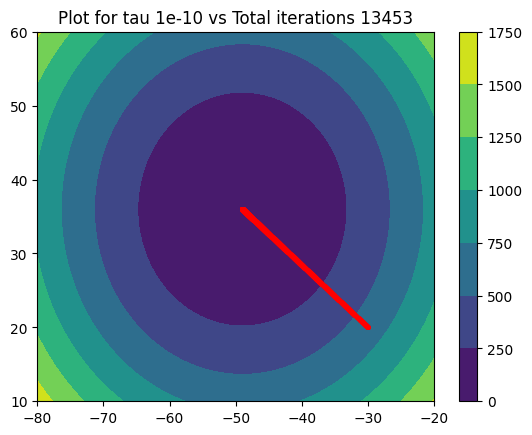

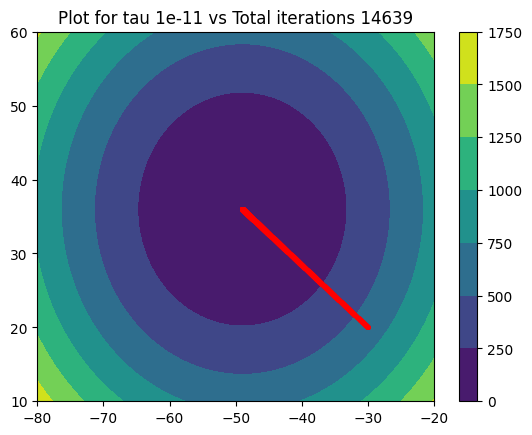

In [5]:
learning_rate_custom = 0.001
initial_position_custom = np.array([-30, 20])

tolerances_custom = [10**(-p) for p in range(1, 12)]

minimizer_store_custom = []
minimum_store_custom = []
iterations_custom2 = []

for tolerance_custom in tolerances_custom:
    current_position_custom = np.copy(initial_position_custom)
    iteration_custom = 0
    gradient_at_current_custom = gradient(current_position_custom)

    x_vals = np.linspace(-80, -20, 1000)
    y_vals = np.linspace(10, 60, 1000)
    X_vals, Y_vals = np.meshgrid(x_vals, y_vals)
    Z_vals = function_g(X_vals, Y_vals)
    plt.contourf(X_vals, Y_vals, Z_vals)
    colorbar_custom = plt.colorbar()

    path_x_custom, path_y_custom = [current_position_custom[0]], [current_position_custom[1]]

    while norm(gradient_at_current_custom) > tolerance_custom:
        current_position_custom = current_position_custom + learning_rate_custom * gradient_at_current_custom
        path_x_custom.append(current_position_custom[0])
        path_y_custom.append(current_position_custom[1])
        gradient_at_current_custom = gradient(current_position_custom)
        iteration_custom += 1

    plt.plot(path_x_custom, path_y_custom, marker='.', color="red", markersize=5)
    plt.title(f"Plot for tau {str(tolerance_custom)} vs Total iterations {iteration_custom}")
    plt.show()

    minimizer_store_custom.append(current_position_custom)
    minimum_store_custom.append(quadratic_function(current_position_custom[0], current_position_custom[1]))
    iterations_custom2.append(iteration_custom)


**4**

Exact line search in gradient descent has drawbacks:

**Computational Expense**: Evaluating the objective function along the search direction is computationally expensive, especially in high-dimensional problems.

**Not Always Necessary**: Achieving convergence doesn't always demand finding the exact minimum step size. Fixed or adaptive learning rates can be sufficient, particularly for well-behaved and convex objective functions.

**Computational Overhead**: The precision from exact line search may not justify the additional computational overhead. Approximate methods, like backtracking line search, strike a balance between accuracy and computational efficiency.

**Limited Applicability to Non-Smooth Functions**: Tailored for smooth, differentiable functions, exact line search may not perform well for non-smooth or discontinuous functions lacking a clearly defined gradient.